In [10]:
#@title Install & Import Dependencies
!pip install CoolProp numpy scipy matplotlib --quiet

import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI
from tabulate import tabulate  # Import tabulate
import CoolProp.CoolProp as CP
import math
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd


print("✅ Initialization complete. All required packages installed.")

✅ Initialization complete. All required packages installed.


In [ ]:
#@title  User-Defined Input Parameters TEMPORARY skid (SI Units)
# CO₂ Flow Parameters
mass_flow_CO2 = 120 / 3600  # kg/s
pressure_CO2_inlet = 40 * 1e5  # 20 bar -> Pa
pressure_CO2_outlet = 105* 1e5  # 105 bar -> Pa
ambient_temp = -5 + 273.15  # K

# Chiller Parameters
subcooling_target = 10  # K
temp_CO2_sat = PropsSI('T', 'P', pressure_CO2_inlet, 'Q', 0, 'CO2')  # K
print(f"- temp_CO2_sat: {temp_CO2_sat -273.15:.2f} oC")

temp_CO2_chiller = temp_CO2_sat - subcooling_target  # K
print(f"- temp_CO2_chiller: {temp_CO2_chiller -273.15:.2f} oC")
temp_glycol_chiller = temp_CO2_chiller - 10  # K (Glycol bath is 10°C below CO₂)

# Glycol Properties (60% glycol-water mixture)
ratio_medium_CO2_mass = 5  # Glycol mass flow is 5x CO₂
mass_flow_medium = ratio_medium_CO2_mass * mass_flow_CO2  # kg/s
cp_glycol_chiller = 3.075 * 1000  # J/kg·K https://www.engineeringtoolbox.com/ethylene-glycol-d_146.html
density_glycol_chiller = 1120  # kg/m³ https://www.engineeringtoolbox.com/ethylene-glycol-d_146.html

U_estimate = 500  # W/m²K
buffer_time = 15 * 60  # 15 min in seconds
coil_diameter = 0.00635  # m length (1/4" diameter)

# Heater 1 (Preheat to 40°C)
temp_CO2_heater1 = 80 + 273.15  # K
temp_water_heater1 = temp_CO2_heater1 + 10  # K

# Heater 2 (Final Heat to 70°C)
temp_CO2_heater2 = 80 + 273.15  # K
temp_water_heater2 = temp_CO2_heater2 + 10  # K

# Water Properties
cp_water = 4.2 * 1000  # J/kg·K on 50-90 degrees C https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html?vA=60&units=C#
density_water = 983.20  # kg/m³ 60 degrees C https://www.engineeringtoolbox.com/water-density-specific-weight-d_595.html

# Pipe Parameters (150m Transport Line)
pipe_length = 30  # m
pipe_diameter_inner = 0.0127  # m (1/2" ID)
pipe_area = (math.pi / 4) * pipe_diameter_inner**2  # m²
pipe_volume = math.pi * (pipe_diameter_inner / 2) ** 2 * pipe_length  # m³
insulation_thickness = 0.06  # 60mm Rockwool
pipe_diameter_outer = pipe_diameter_inner + insulation_thickness * 2  # m
k_insulation = 0.035  # W/m·K https://www.engineeringtoolbox.com/mineral-wool-insulation-k-values-d_815.html
pipe_roughness = 0.006 * 1e-3  # m (Stainless bead-blasted/turned) https://www.engineeringtoolbox.com/surface-roughness-ventilation-ducts-d_209.html

# Engineering Factors
heat_exchanger_efficiency = 0.85  # 85% efficiency
safety_factor = 1.2  # 20% oversizing

print("✅ User-defined parameters set.")

- temp_CO2_sat: 5.30 oC
- temp_CO2_sat: -4.70 oC
✅ User-defined parameters set.


In [ ]:
#@title  User-Defined Input Parameters permanent skid (SI Units)
# CO₂ Flow Parameters
mass_flow_CO2 = 120 / 3600  # kg/s
pressure_CO2_inlet = 20 * 1e5  # 20 bar -> Pa
pressure_CO2_outlet = 105* 1e5  # 105 bar -> Pa
ambient_temp = -5 + 273.15  # K

# Chiller Parameters
subcooling_target = 8  # K
temp_CO2_sat = PropsSI('T', 'P', pressure_CO2_inlet, 'Q', 0, 'CO2')  # K
print(f"- temp_CO2_sat: {temp_CO2_sat -273.15:.2f} oC")

temp_CO2_chiller = temp_CO2_sat - subcooling_target  # K
temp_glycol_chiller = temp_CO2_chiller - 5  # K (Glycol bath is 10°C below CO₂)

# Glycol Properties (60% glycol-water mixture)
ratio_medium_CO2_mass = 5  # Glycol mass flow is 5x CO₂
mass_flow_medium = ratio_medium_CO2_mass * mass_flow_CO2  # kg/s
cp_glycol_chiller = 3.075 * 1000  # J/kg·K https://www.engineeringtoolbox.com/ethylene-glycol-d_146.html
density_glycol_chiller = 1120  # kg/m³ https://www.engineeringtoolbox.com/ethylene-glycol-d_146.html

U_estimate = 500  # W/m²K
buffer_time = 15 * 60  # 15 min in seconds
coil_diameter = 0.00635  # m length (1/4" diameter)

# Heater 1 (Preheat to 40°C)
temp_CO2_heater1 = 5 + 273.15  # K
temp_water_heater1 = temp_CO2_heater1 + 10  # K

# Heater 2 (Final Heat to 70°C)
temp_CO2_heater2 = 50 + 273.15  # K
temp_water_heater2 = temp_CO2_heater2 + 10  # K

# Water Properties
cp_water = 4.2 * 1000  # J/kg·K on 50-90 degrees C https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html?vA=60&units=C#
density_water = 983.20  # kg/m³ 60 degrees C https://www.engineeringtoolbox.com/water-density-specific-weight-d_595.html

# Pipe Parameters (150m Transport Line)
pipe_length = 150  # m
pipe_diameter_inner = 0.0127  # m (1/2" ID)
pipe_area = (math.pi / 4) * pipe_diameter_inner**2  # m²
pipe_volume = math.pi * (pipe_diameter_inner / 2) ** 2 * pipe_length  # m³
insulation_thickness = 0.06  # 60mm Rockwool
pipe_diameter_outer = pipe_diameter_inner + insulation_thickness * 2  # m
k_insulation = 0.035  # W/m·K https://www.engineeringtoolbox.com/mineral-wool-insulation-k-values-d_815.html
pipe_roughness = 0.006 * 1e-3  # m (Stainless bead-blasted/turned) https://www.engineeringtoolbox.com/surface-roughness-ventilation-ducts-d_209.html

# Engineering Factors
heat_exchanger_efficiency = 1
safety_factor = 1.0

print("✅ User-defined parameters set.")

- temp_CO2_sat: -19.50 oC
✅ User-defined parameters set.


In [ ]:
#@title Calculations
def coil_length_bath(Q, T_in, T_medium_in):
    """Calculates coil length assuming a constant-temperature stirred bath."""
    delta_T = T_medium_in - T_in  # Constant driving force
    A_required = Q / (U_estimate * delta_T)  # Required heat exchange area
    return A_required / (np.pi * coil_diameter)  # Coil length (1/4" diameter)

def coil_length_countercurrent(Q, T_in, T_out, T_medium_in, medium_flowrate, medium_cp):
    """Calculates coil length assuming countercurrent heat exchanger."""
    T_medium_out = T_medium_in - (Q / (medium_flowrate * medium_cp))
    LMTD = ((T_medium_out - T_in) - (T_medium_in - T_out)) / np.log((T_medium_out - T_in) / (T_medium_in - T_out))
    print(f"- TMTD: {LMTD:.2f} K")
    A_required = Q / (U_estimate * LMTD)
    return A_required / (np.pi * coil_diameter)

def calculate_thermal_volume(Q, T_in, T_medium_in, medium_cp, medium_density):
    """Calculates required medium mass for time buffer."""
    delta_T = T_medium_in - T_in
    mass_bath = Q * buffer_time / (medium_cp * delta_T)
    return mass_bath / medium_density  # Convert to m³

#@title Major calculations and report

enthalpy_CO2_chiller_in = PropsSI("H", "P", pressure_CO2_inlet, "Q", 0, "CO2")
enthalpy_CO2_chiller_out = PropsSI("H", "P", pressure_CO2_inlet, "T", temp_CO2_chiller, "CO2")
Q_chiller = (mass_flow_CO2 * (enthalpy_CO2_chiller_out - enthalpy_CO2_chiller_in))
Q_chiller_actual = Q_chiller / heat_exchanger_efficiency * safety_factor

coil_length_chiller_bath = coil_length_bath(Q_chiller_actual, temp_CO2_sat, temp_glycol_chiller)
coil_length_chiller_counter = coil_length_countercurrent(Q_chiller_actual, temp_CO2_sat, temp_CO2_chiller, temp_glycol_chiller, mass_flow_medium, cp_glycol_chiller)
thermal_volume_chiller = calculate_thermal_volume(Q_chiller_actual, temp_CO2_sat, temp_glycol_chiller, cp_glycol_chiller, density_glycol_chiller)

#@title **Step 6: Heater 1 Calculations**
enthalpy_CO2_heater1_in = PropsSI("H", "P", pressure_CO2_outlet, "T", temp_CO2_chiller, "CO2")
enthalpy_CO2_heater1_out = PropsSI("H", "P", pressure_CO2_outlet, "T", temp_CO2_heater1, "CO2")
Q_heater1 = (mass_flow_CO2 * (enthalpy_CO2_heater1_out - enthalpy_CO2_heater1_in))
Q_heater1_actual = Q_heater1 / heat_exchanger_efficiency * safety_factor

coil_length_heater1_bath = coil_length_bath(Q_heater1_actual, temp_CO2_chiller, temp_water_heater1)
coil_length_heater1_counter = coil_length_countercurrent(Q_heater1_actual, temp_CO2_chiller, temp_CO2_heater1, temp_water_heater1, mass_flow_medium, cp_water)
thermal_volume_heater1 = calculate_thermal_volume(Q_heater1_actual, temp_CO2_chiller, temp_water_heater1, cp_water, density_water)

#@title **Step 7: Transport Pipe Calculations**
# Fourier’s Law for cylindrical heat conduction:
Q_loss_per_meter = (2 * math.pi * k_insulation * (temp_CO2_heater1 - ambient_temp)) / math.log(pipe_diameter_outer / pipe_diameter_inner)
Q_loss_total = Q_loss_per_meter * pipe_length

cp_CO2_transport = PropsSI('C', 'P', pressure_CO2_outlet, 'T', temp_CO2_heater1, 'CO2')
temp_CO2_transport = temp_CO2_heater1 - (Q_loss_total / (mass_flow_CO2 * cp_CO2_transport))

# Pipe Flow & Pressure Drop Calculations
density_CO2_transport = PropsSI('D', 'P', pressure_CO2_outlet, 'T', temp_CO2_transport, 'CO2')

pipe_velocity = mass_flow_CO2 / density_CO2_transport / pipe_area
pipe_mass_CO2 = pipe_volume * density_CO2_transport
pipe_residence_time = pipe_mass_CO2 / mass_flow_CO2

#@title **Calculate Pressure Drop (Darcy-Weisbach)**# Calculate Reynolds number
# Use approximation for friction factor (Haaland equation)
# Apply Darcy-Weisbach equation
viscosity_CO2_transport = PropsSI('V', 'P', pressure_CO2_outlet, 'T', temp_CO2_transport, 'CO2')
Re = (density_CO2_transport * pipe_velocity * pipe_diameter_inner) / viscosity_CO2_transport
f = (1 / (-1.8 * math.log10((6.9 / Re) + (pipe_roughness / (3.7 * pipe_diameter_inner))**1.11)))**2
pressure_drop_pipe = f * (pipe_length / pipe_diameter_inner) * (density_CO2_transport * pipe_velocity**2 / 2)   # Pa
pressure_CO2_transport = pressure_CO2_outlet - pressure_drop_pipe


#@title **Step 9: Heat Loss to Pipe Thermal Mass Calculation (Loop Over Pipe Sizes)**
cp_steel = 500  # J/kg·K https://www.engineeringtoolbox.com/stainless-steel-specific-heat-thermal-conductivity-vs-temperature-d_2225.html
pipe_inches = [0.5, 0.75, 1]
pipe_weight_per_m = [1.265, 1.680, 2.494] # 1/2, 3/4, 1", https://www.engineeringtoolbox.com/asme-steel-pipes-sizes-d_42.html

delta_T_pipe = temp_CO2_heater1 - ambient_temp  # K
# Dictionary to store heat loss results
heat_loss_results = {}
# Loop over pipe sizes
for i in range(len(pipe_weight_per_m)):
    pipe_mass = pipe_weight_per_m[i] * pipe_length  # kg
    # Calculate heat loss due to heating the pipe itself
    Q_pipe_heating = pipe_mass * cp_steel * delta_T_pipe  # Joules
    Q_pipe_heating_kW = Q_pipe_heating / 1000  # Convert to kJ
    heat_loss_results[f"{pipe_inches[i]:.2f}inch (Sch 40)"] = Q_pipe_heating_kW


#@title **Step 8: Heater 2 Calculations**
enthalpy_CO2_heater2_in = PropsSI("H", "P", pressure_CO2_transport, "T", temp_CO2_transport, "CO2")
enthalpy_CO2_heater2_out = PropsSI("H", "P", pressure_CO2_transport, "T", temp_CO2_heater2, "CO2")
Q_heater2 = (mass_flow_CO2 * (enthalpy_CO2_heater2_out - enthalpy_CO2_heater2_in))
Q_heater2_actual = Q_heater2 / heat_exchanger_efficiency * safety_factor

#Q_heater2_actual = calculate_duty(pressure_CO2_outlet, temp_CO2_transport, temp_CO2_heater2)
coil_length_heater2_bath = coil_length_bath(Q_heater2_actual, temp_CO2_transport, temp_water_heater2)
coil_length_heater2_counter = coil_length_countercurrent(Q_heater2_actual, temp_CO2_transport, temp_CO2_heater2, temp_water_heater2, mass_flow_medium, cp_water)
thermal_volume_heater2 = calculate_thermal_volume(Q_heater2_actual, temp_CO2_transport, temp_water_heater2, cp_water, density_water)

#@title **Step 10: Final Report of All Calculations**
print("\n🎯 **Final Design Summary** 🎯")

# Chiller Report
print("\n🔹 **Chiller Summary** 🔹")
print(f"- Chiller Duty: {-Q_chiller_actual / 1000:.2f} kW")
print(f"- Chiller Area: {coil_length_chiller_bath * np.pi * coil_diameter:.2f} m2")
#print(f"- Chiller Coil Length (Bath): {coil_length_chiller_bath:.2f} m")
#print(f"- Chiller Coil Length (Counter): {coil_length_chiller_counter:.2f} m")
#print(f"- Chiller Thermal Mass: {-thermal_volume_chiller * 1000:.2f} liters")

# Heater 1 Report
print("\n🔹 **Heater 1 Summary** 🔹")
print(f"- Heater 1 Duty: {Q_heater1_actual / 1000:.2f} kW")
print(f"- Heater 1 Area: {coil_length_heater1_bath* np.pi * coil_diameter:.2f} m2")
#print(f"- Heater 1 Coil Length (Bath): {coil_length_heater1_bath:.2f} m")
#print(f"- Heater 1 Coil Length (Counter): {coil_length_heater1_counter:.2f} m")
#print(f"- Heater 1 Thermal Mass: {thermal_volume_heater1 * 1000:.2f} liters")

# Heater 2 Report
print("\n🔹 **Heater 2 Summary** 🔹")
print(f"- Heater 2 Duty: {Q_heater2_actual / 1000:.2f} kW")
print(f"- Heater 2 Area: {coil_length_heater2_bath* np.pi * coil_diameter:.2f} m2")
#print(f"- Heater 2 Coil Length (Bath): {coil_length_heater2_bath:.2f} m")
#print(f"- Heater 2 Coil Length (Counter): {coil_length_heater2_counter:.2f} m")
#print(f"- Heater 2 Thermal Mass: {thermal_volume_heater2 * 1000:.2f} liters")

# Transport Pipe Report
print("\n🔹 **Transport Pipe Summary (150m)** 🔹")
print(f"- CO₂ Flow Velocity: {pipe_velocity:.2f} m/s")
print(f"- CO₂ Pipe Hold-Up Volume: {pipe_volume:.3f} m³")
print(f"- CO₂ Pipe Hold-Up Mass: {pipe_mass_CO2:.2f} kg")
print(f"- Residence Time in Pipe: {pipe_residence_time:.2f} seconds")
print(f"- Heat Loss Over Pipe: {Q_loss_total / 1000:.2f} kW")
print(f"- CO₂ Final Temp After 150m: {temp_CO2_transport - 273.15:.2f}°C")
print(f"- Transport Pipe Pressure Drop: {pressure_drop_pipe / 1e5:.3f} bar")

print("\n🎯 **Heat Loss Due to Heating the Pipe Thermal Mass** 🎯")
for pipe_size, heat_loss in heat_loss_results.items():
    print(f"- Pipe Size: {pipe_size} → Heat Loss: {heat_loss / 1000:.2f} kW")  # Convert to kW
print("\n✅ Calculation completed successfully.")

print("\n✅ All calculations completed successfully.")

#@title **Step 8: Generate Full Input Parameter Report**
print("\n🎯 **Input Parameter Summary** 🎯")

# User-Defined Inputs
print("\n🔹 **User-Defined Process Parameters** 🔹")
print(f"- CO₂ Mass Flow Rate: {mass_flow_CO2 * 3600:.2f} kg/h")
print(f"- CO₂ Inlet Pressure: {pressure_CO2_inlet / 1e5:.2f} bar")
print(f"- CO₂ Outlet Pressure: {pressure_CO2_outlet / 1e5:.2f} bar")
print(f"- Ambient Temperature: {ambient_temp - 273.15:.2f}°C")

print("\n🔹 **User-Defined Chiller Parameters** 🔹")
print(f"- Subcooling Target: {subcooling_target:.2f} K")
print(f"- Chiller Glycol Bath Temperature: {temp_glycol_chiller - 273.15:.2f}°C")
print(f"- Glycol to CO₂ Mass Flow Ratio: {ratio_medium_CO2_mass:.2f}")

print("\n🔹 **User-Defined Heater Parameters** 🔹")
print(f"- Heater 1 Target Temperature: {temp_CO2_heater1 - 273.15:.2f}°C")
print(f"- Heater 1 Water Bath Temperature: {temp_water_heater1 - 273.15:.2f}°C")
print(f"- Heater 2 Target Temperature: {temp_CO2_heater2 - 273.15:.2f}°C")
print(f"- Heater 2 Water Bath Temperature: {temp_water_heater2 - 273.15:.2f}°C")

print("\n🔹 **User-Defined Pipe Parameters** 🔹")
print(f"- Pipe Length: {pipe_length:.2f} m")
print(f"- Pipe Inner Diameter: {pipe_diameter_inner * 1000:.2f} mm")
print(f"- Pipe Insulation Thickness: {insulation_thickness * 1000:.2f} mm")
print(f"- Pipe Roughness: {pipe_roughness * 1e6:.2f} µm")

print("\n🔹 **Engineering Factors** 🔹")
print(f"- Heat Exchanger Efficiency: {heat_exchanger_efficiency * 100:.1f}%")
print(f"- Safety Factor: {safety_factor:.2f}")
print(f"- Overall Heat Transfer Coefficient: {U_estimate:.0f} W/m²K")
print(f"- Buffer Time for Thermal Mass Calculation: {buffer_time / 60:.0f} min")

# Physical Properties Report
print("\n🎯 **Physical Properties Summary** 🎯")

print("\n🔹 **Chiller Medium Properties (Glycol-Water)** 🔹")
print(f"- Glycol Specific Heat Capacity: {cp_glycol_chiller:.0f} J/kg·K")
print(f"- Glycol Density: {density_glycol_chiller:.0f} kg/m³")

print("\n🔹 **Heater Medium Properties (Water)** 🔹")
print(f"- Water Specific Heat Capacity: {cp_water:.0f} J/kg·K")
print(f"- Water Density: {density_water:.0f} kg/m³")

print("\n🔹 **Pipe Insulation Properties** 🔹")
print(f"- Insulation Thermal Conductivity: {k_insulation:.3f} W/m·K")

print("\n✅ **All input parameters successfully reported.**")




- TMTD: -7.96 K
- TMTD: 21.41 K
- TMTD: 24.53 K

🎯 **Final Design Summary** 🎯

🔹 **Chiller Summary** 🔹
- Chiller Duty: 0.57 kW
- Chiller Area: 0.09 m2

🔹 **Heater 1 Summary** 🔹
- Heater 1 Duty: 2.24 kW
- Heater 1 Area: 0.11 m2

🔹 **Heater 2 Summary** 🔹
- Heater 2 Duty: 5.54 kW
- Heater 2 Area: 0.19 m2

🔹 **Transport Pipe Summary (150m)** 🔹
- CO₂ Flow Velocity: 0.27 m/s
- CO₂ Pipe Hold-Up Volume: 0.019 m³
- CO₂ Pipe Hold-Up Mass: 18.27 kg
- Residence Time in Pipe: 548.00 seconds
- Heat Loss Over Pipe: 0.14 kW
- CO₂ Final Temp After 150m: 3.11°C
- Transport Pipe Pressure Drop: 0.104 bar

🎯 **Heat Loss Due to Heating the Pipe Thermal Mass** 🎯
- Pipe Size: 0.50inch (Sch 40) → Heat Loss: 0.95 kW
- Pipe Size: 0.75inch (Sch 40) → Heat Loss: 1.26 kW
- Pipe Size: 1.00inch (Sch 40) → Heat Loss: 1.87 kW

✅ Calculation completed successfully.

✅ All calculations completed successfully.

🎯 **Input Parameter Summary** 🎯

🔹 **User-Defined Process Parameters** 🔹
- CO₂ Mass Flow Rate: 120.00 kg/h
- CO₂

In [ ]:
#@title quick calcs
density_CO2_chiller_in_liquid = PropsSI("D", "P", pressure_CO2_inlet, "Q", 0, "CO2")

density_CO2_chiller_in_gas = PropsSI("D", "P", pressure_CO2_inlet, "Q", 1, "CO2")

density_CO2_gas_at_min20c = PropsSI("D", "T", -20+273.15, "Q", 1, "CO2")
density_CO2_gas_at_5c = PropsSI("D", "T", 5+273.15, "Q", 1, "CO2")
density_CO2_gas_at_30c = PropsSI("D", "T", 30+273.15, "Q", 1, "CO2")

density_CO2_gas_at_11bara = PropsSI("D", "P", 11*1e5, "Q", 1, "CO2")


#density_liquid = CP.PropsSI('D', 'P', pressure_CO2_inlet, 'T', temp_CO2_sat, "CO2", phase='liquid')
#density_gas = CP.PropsSI('D', 'P', pressure_CO2_inlet, 'T', temp_CO2_sat, "CO2", phase='gas')

temp_ambient = 5 + 273.15
pressure_CO2_liquid_in = PropsSI("P", "T", temp_ambient, "Q", 0, "CO2")
enthalphy_CO2_liquid_in = PropsSI("H", "T", temp_ambient, "Q", 0, "CO2")
enthalphy_CO2_liquid_out = PropsSI("H", "T",temp_ambient-10, "P",pressure_CO2_liquid_in, "CO2")
Q_chiller_liquid = mass_flow_CO2 * (enthalphy_CO2_liquid_out - enthalphy_CO2_liquid_in)
Q_chiller_actual = Q_chiller / heat_exchanger_efficiency * safety_factor

pressure_CO2_gas_in = PropsSI("P", "T", temp_ambient, "Q", 1, "CO2")
enthalphy_CO2_gas_in = PropsSI("H", "T", temp_ambient, "Q", 1, "CO2")

Q_chiller_gas = mass_flow_CO2 * (enthalphy_CO2_liquid_out - enthalphy_CO2_gas_in)
Q_chiller_actual = Q_chiller / heat_exchanger_efficiency * safety_factor
Ratio = Q_chiller_gas/Q_chiller_liquid

coil_length_chiller_bath * np.pi * coil_diameter, coil_length_heater1_bath * np.pi * coil_diameter, coil_length_heater2_bath * np.pi * coil_diameter


(0.07049607476423697, 0.14401519032490487, 0.2327101699098694)

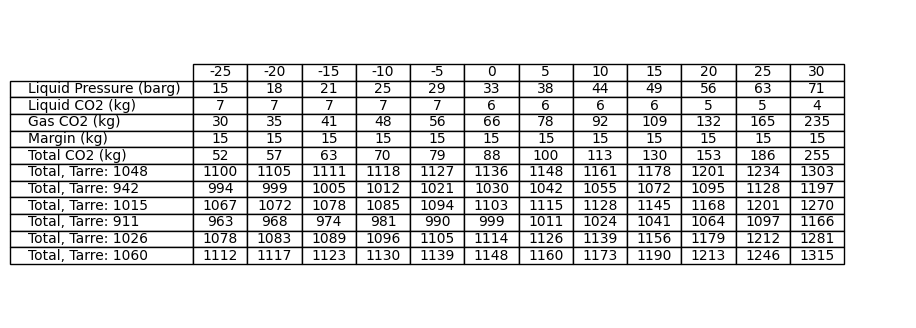

Temperature (°C)         -25   -20   -15   -10   -5     0     5     10    15  \
Liquid Pressure (barg)    15    18    21    25    29    33    38    44    49   
Liquid CO2 (kg)            7     7     7     7     7     6     6     6     6   
Gas CO2 (kg)              30    35    41    48    56    66    78    92   109   
Margin (kg)               15    15    15    15    15    15    15    15    15   
Total CO2 (kg)            52    57    63    70    79    88   100   113   130   
Total, Tarre: 1048      1100  1105  1111  1118  1127  1136  1148  1161  1178   
Total, Tarre: 942        994   999  1005  1012  1021  1030  1042  1055  1072   
Total, Tarre: 1015      1067  1072  1078  1085  1094  1103  1115  1128  1145   
Total, Tarre: 911        963   968   974   981   990   999  1011  1024  1041   
Total, Tarre: 1026      1078  1083  1089  1096  1105  1114  1126  1139  1156   
Total, Tarre: 1060      1112  1117  1123  1130  1139  1148  1160  1173  1190   

Temperature (°C)          20    25    3

'\nvalidation: 11-feb-25, 12:00\nwe saw a sudden drop in flow at about 6min before we stopped. At that time the flow was average 32kg/h, os that is 3.2kg. The end-weight of the rack 1146 + 3kg = 1149, so when the temperature of the hall was 12degrees that would be spot on.\nIf we add an 15kg margin on the table, we should be ok.\n'

In [ ]:
#@title Generate Table of weight in racks vs temp


# Constants
pipe_height = 15e-3  # 15 mm in meters
bottle_circumference = 0.725 - 2 * 3e-3   #72.5cm in m, outer circumference, assuming 3mm thickness, so worst case for liquid mass
margin_mass = 15 #kg of margin
bottle_diameter = bottle_circumference/np.pi  # from circumference
bottle_radius = bottle_diameter / 2
bottle_area = np.pi * (bottle_radius ** 2)  # Cross-sectional area

num_bottles = 12  # Total number of bottles in the rack
rack_volume_prescribed = 0.6  # Total bottle volume in m^3 (600 liters, according to tarre plate)
bottle_height_from_volume = rack_volume_prescribed / num_bottles / bottle_area # check height: in field: 139cm round bottom till round top, 150 full height, 144cm nett height?
bottle_height_measured = 1.40 # assumed nett internal height
rack_volume_from_bottle_height = bottle_height_measured * bottle_area * num_bottles #-> 10% more voluem in bottles?

rack_volume = rack_volume_from_bottle_height

liquid_volume = bottle_area * pipe_height * num_bottles  # Liquid volume in m^3
gas_volume = rack_volume - liquid_volume  # Gas volume in m^3
rack_weights = [1048, 942, 1015, 911, 1026, 1060] # Array of rack weights

# Generate table data
temps = np.arange(-25, 31, 5)  # 0 to 30°C in 5-degree increments
co2_data = []

for temp in temps:
    temp_k = temp + 273.15  # Convert to Kelvin

    pressure = PropsSI('P', 'T', temp_k, 'Q', 1, 'CO2') / 1e5 -1 # Convert Pa to barg
    liquid_density = PropsSI('D', 'T', temp_k, 'Q', 0, 'CO2')
    gas_density = PropsSI('D', 'T', temp_k, 'Q', 1, 'CO2')

    liquid_mass = liquid_volume * liquid_density  # Mass of liquid CO2 in kg
    gas_mass = gas_volume * gas_density  # Mass of gas CO2 in kg

    total_mass = liquid_mass + gas_mass + margin_mass # Total CO2 mass in kg


    # Calculate total weight for each rack and append to row data
    row_data = [temp, pressure, liquid_mass, gas_mass, margin_mass, total_mass]
    for rack_weight in rack_weights:
        total_weight = total_mass + rack_weight
        row_data.append(total_weight)  # Add total weight to row

    co2_data.append(row_data)  # Append row data to main data list

# Create DataFrame with dynamic column names
columns = [
    "Temperature (°C)", "Liquid Pressure (barg)",
    "Liquid CO2 (kg)", "Gas CO2 (kg)", "Margin (kg)", "Total CO2 (kg)"
]
# Dynamically add rack weight column names
for i in range(len(rack_weights)):
    columns.append(f"Total, Tarre: {rack_weights[i]}")

df = pd.DataFrame(co2_data, columns=columns).set_index("Temperature (°C)")

# Format to one decimal place and transpose
df_formatted = df.astype(str).apply(lambda s: s.str.split('.').str[0]).T


# Display table with borders
#print(tabulate(df_formatted, headers="keys", tablefmt="psql"))

# Display table as an image and save to file
fig, ax = plt.subplots(figsize=(10, 4)) # Adjust figure size as needed
ax.axis('off')  # Hide axes
table = ax.table(cellText=df_formatted.values, colLabels=df_formatted.columns,
                 rowLabels=df_formatted.index, loc='center', cellLoc='center')
#table.auto_set_font_size(False)
#table.set_fontsize(10)
#table.scale(1.0, 1.0)  # Adjust scale for better spacing
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)  # Adjust whitespace

# Get the current column widths
col_widths = [table.get_celld()[(0, j)].get_width() for j in range(len(df_formatted.columns))]
# Set new column widths to 50% of the original, skipping the first column
desired_width = 0.07  # Replace with your desired width
for i in range(0, len(col_widths)):  # Start from index 1 to skip the first column
    # Instead of using get_num_rows, directly use len(df_formatted) to get number of rows
    for row_index in range(len(df_formatted)+1): # Iterate over all rows in the table
        table[row_index, i].set_width(desired_width) # Apply desired_width to all cells in the column
    # table[0, i].set_width(desired_width)  # Set the width for the cell in the top row of the column

file_path = '/content/drive/MyDrive/Colab Notebooks/co2_table.png'
fig.savefig(file_path, bbox_inches='tight') # Save to file
plt.show() # Display


# Display table
print(df_formatted)


"""
\n
validation: 11-feb-25, 12:00
we saw a sudden drop in flow at about 6min before we stopped. At that time the flow was average 32kg/h, os that is 3.2kg. The end-weight of the rack 1146 + 3kg = 1149, so when the temperature of the hall was 12degrees that would be spot on.
If we add an 15kg margin on the table, we should be ok.
"""

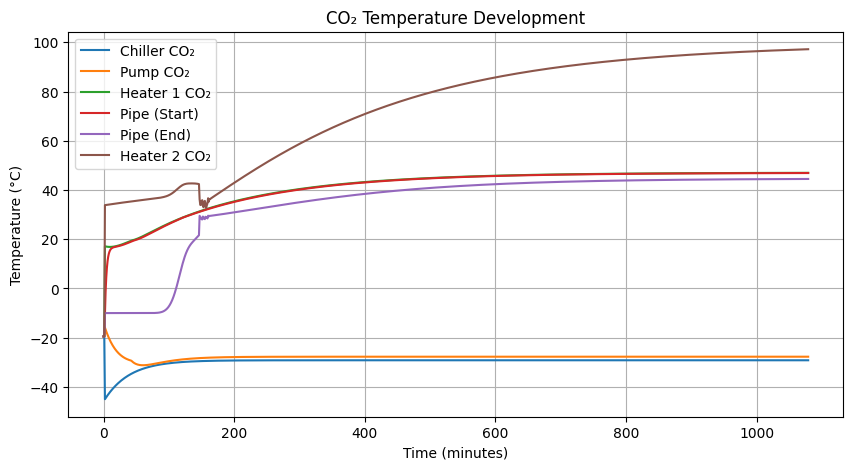

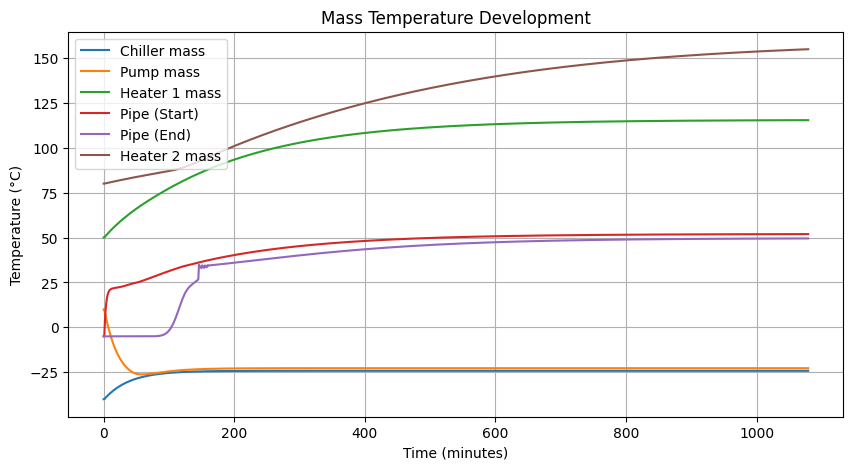

'\n# Visualization\ncmap_co2 = cm.get_cmap(\'Reds\', 4)\ncmap_mass = cm.get_cmap(\'Blues\', 4)\ntime_indices = [5, 15, 30, 60]  # Time in minutes\n\nplt.figure(figsize=(10, 6))\nfor i, t in enumerate(time_indices):\n    plt.plot(temp_pipe_CO2[:, t*60] - 273.15, color=cmap_co2(i), label=f"CO₂ Temp at {t} min")\n    plt.plot(temp_pipe_mass[:, t*60] - 273.15, \'--\', color=cmap_mass(i), label=f"Thermal Mass Temp at {t} min")\nplt.xlabel("Pipe Section")\nplt.ylabel("Temperature (°C)")\nplt.legend()\nplt.title("Temperature Profiles Over Time")\nplt.grid()\nplt.show()\n'

In [ ]:
#@title Timeloop temp profile
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI
import matplotlib.cm as cm

# Time settings
total_time = 3*60*60  # seconds (3 hour)
time_step = 10  # 1-minute steps
time_steps = total_time // time_step # floor division


# CO₂ Properties
mass_flow_CO2 = 120 / 3600  # kg/s
pressure_CO2_inlet = 20e5  # Pa (20 bar)
pressure_CO2_outlet = 70e5  # Pa (105 bar)
temp_ambient = -5 + 273.15  # K
temp_CO2_sat = PropsSI("T", "P", pressure_CO2_inlet, "Q", 0, "CO2")  # K

# Component Parameters
d_inner_coil = 0.00635  # 1/4" ID tubing (m)
U_value = 500  # W/m²K

# Chiller
coil_length_chiller = 3.5  # m
temp_chiller = -40 + 273.15  # K
mass_chiller= 10 # kg
duty_chiller = -0.7e3  # W
cp_chiller = 2800 # J/kg/K

# Pump
coil_length_pump = 0.5  # m
temp_pump = 10 + 273.15  # K
mass_pump = 20  # kg
duty_pump = 0.1e3  # W (negative cause it chills)
cp_pump = 500  # J/kg·K

# Heaters
coil_length_heater1 = 7  # m
temp_heater1 = 50 + 273.15  # K
mass_heater1 = 15  # kg
duty_heater1 = 5e3  # W
cp_heater = 4200 #J/kg/K

coil_length_heater2 = 5  # m
temp_heater2 = 80 + 273.15  # K
mass_heater2 = 25  # kg
duty_heater2 = 4e3  # W

# Pipe
length_pipe = 150  # m
pipe_diameter_inner = 15.798/1000 # 1/2" ID piping 40 schedule (m) https://www.engineeringtoolbox.com/asme-steel-pipes-sizes-d_42.html
pipe_diameter_outer = pipe_diameter_inner + 2.769/1000 + 0.06 * 2  # 60mm insulation
pipe_mass_per_meter = 1.265 # kg/m
cp_pipe = 500  # J/kg/K
k_insulation = 0.035  # W/m·K
# Pipe segmentation
num_segments = 30  # 150m divided into 30x 5m sections

# Precompute Areas & Masses
coil_area_chiller = np.pi * d_inner_coil * coil_length_chiller
coil_area_pump = np.pi * d_inner_coil * coil_length_pump
coil_area_heater1 = np.pi * d_inner_coil * coil_length_heater1
coil_area_heater2 = np.pi * d_inner_coil * coil_length_heater2
pipe_area_segment = np.pi * d_inner_coil * (length_pipe / num_segments)
pipe_mass_segment = pipe_mass_per_meter * (length_pipe / num_segments)

# Initialize Temperatures
temp_chiller_CO2 = np.full(time_steps, temp_CO2_sat)
temp_chiller_mass = np.full(time_steps, temp_chiller)

temp_pump_CO2 = np.full(time_steps, temp_CO2_sat)
temp_pump_mass = np.full(time_steps, temp_pump)

temp_heater1_CO2 = np.full(time_steps, temp_CO2_sat)
temp_heater1_mass = np.full(time_steps, temp_heater1)

temp_pipe_CO2 = np.full((num_segments, time_steps), temp_CO2_sat)
temp_pipe_mass = np.full((num_segments, time_steps), temp_ambient)

temp_heater2_CO2 = np.full(time_steps, temp_CO2_sat)
temp_heater2_mass = np.full(time_steps, temp_heater2)



def get_cp_CO2(P, T):
  try:
    return PropsSI("C", "P", P, "T", T, "CO2")
  except:
    return PropsSI("C", "P", P, "Q", 0, "CO2")  # Use liquid property if near phase change #if close to saturation, return liquid property


# Time-Step Loop
for t in range(2, time_steps):
    # Chiller
    T_hot_in, T_hot_out = temp_CO2_sat, temp_chiller_CO2[t-1]
    T_cold = temp_chiller_mass[t-1]

    delta_T_LMTD = T_cold - T_hot_in #((T_hot_in - T_cold) - (T_hot_out - T_cold)) / np.log((T_hot_in - T_cold) / (T_hot_out - T_cold))
    cp_CO2 = get_cp_CO2(pressure_CO2_inlet, T_hot_in)
    Q_coil = U_value * coil_area_chiller * delta_T_LMTD
    Q_temp = (delta_T_LMTD-5) * mass_flow_CO2 * cp_CO2 #K * kg/ * J/kg/K = J/s
    Q_exchange = min(Q_coil, Q_temp)
    temp_chiller_CO2[t] = T_hot_in + (Q_exchange / (mass_flow_CO2 * cp_CO2))
    temp_chiller_mass[t] = T_cold + (duty_chiller - Q_exchange) * time_step / (mass_chiller * cp_chiller)

    # Pump
    T_hot_in, T_hot_out = temp_chiller_CO2[t], temp_pump_CO2[t-1]
    T_cold = temp_pump_mass[t-1]
    delta_T_LMTD = T_cold - T_hot_in #((T_hot_in - T_cold) - (T_hot_out - T_cold)) / np.log((T_hot_in - T_cold) / (T_hot_out - T_cold))
    cp_CO2 = get_cp_CO2(pressure_CO2_inlet, T_hot_in)
    Q_coil = U_value * coil_area_chiller * delta_T_LMTD
    Q_temp = (delta_T_LMTD-5) * mass_flow_CO2 * cp_CO2 #K * kg/ * J/kg/K = J/s
    Q_exchange = min(Q_coil, Q_temp)
    temp_pump_CO2[t] = T_hot_in + (Q_exchange / (mass_flow_CO2 * cp_CO2))
    temp_pump_mass[t] = T_cold + (duty_pump - Q_exchange)* time_step / (mass_pump * cp_pump)

    # Heater 1
    T_hot_in, T_hot_out = temp_pump_CO2[t], temp_heater1_CO2[t-1]
    T_cold = temp_heater1_mass[t-1]
    delta_T_LMTD = T_cold - T_hot_in #((T_hot_in - T_cold) - (T_hot_out - T_cold)) / np.log((T_hot_in - T_cold) / (T_hot_out - T_cold))
    cp_CO2 = get_cp_CO2(pressure_CO2_outlet, T_hot_in)
    Q_coil = U_value * coil_area_chiller * delta_T_LMTD
    Q_temp = (delta_T_LMTD-5) * mass_flow_CO2 * cp_CO2 #K * kg/ * J/kg/K = J/s
    Q_exchange = min(Q_coil, Q_temp)
    temp_heater1_CO2[t] = T_hot_in + (Q_exchange / (mass_flow_CO2 * cp_CO2))
    temp_heater1_mass[t] = T_cold + (duty_heater1 - Q_exchange ) * time_step / (mass_heater1 * cp_heater)


    # Pipe Sections
 # Pipe Sections
    for i in range(num_segments):
        if i == 0:
            T_hot_in, T_hot_out = temp_heater1_CO2[t], temp_pipe_CO2[i, t-1]
        else:
            T_hot_in, T_hot_out = temp_pipe_CO2[i-1, t], temp_pipe_CO2[i, t-1]

        T_cold = temp_pipe_mass[i,t-1]
        delta_T_LMTD = T_cold - T_hot_in #((T_hot_in - T_cold) - (T_hot_out - T_cold)) / np.log((T_hot_in - T_cold) / (T_hot_out - T_cold))
        cp_CO2 = get_cp_CO2(pressure_CO2_outlet, T_hot_in)
        Q_coil = U_value * coil_area_chiller * delta_T_LMTD
        Q_temp = (delta_T_LMTD-5) * mass_flow_CO2 * cp_CO2 #K * kg/ * J/kg/K = J/s
        Q_exchange = min(Q_coil, Q_temp)
        Q_loss = (2 * np.pi * k_insulation * (temp_ambient - T_cold)) / np.log(pipe_diameter_outer / pipe_diameter_inner)
        temp_pipe_CO2[i, t] = T_hot_in + (Q_exchange / (mass_flow_CO2 * cp_CO2))
        temp_pipe_mass[i, t] = T_cold + (Q_loss - Q_exchange) * time_step / (pipe_mass_segment * cp_pipe)

    # Heater 2
    T_hot_in, T_hot_out = temp_pipe_CO2[-1, t], temp_heater2_CO2[t-1]
    T_cold = temp_heater2_mass[t-1]
    delta_T_LMTD = T_cold - T_hot_in #((T_hot_in - T_cold) - (T_hot_out - T_cold)) / np.log((T_hot_in - T_cold) / (T_hot_out - T_cold))
    cp_CO2 = get_cp_CO2(pressure_CO2_outlet, T_hot_in)
    Q_coil = U_value * coil_area_chiller * delta_T_LMTD
    Q_temp = (delta_T_LMTD-5) * mass_flow_CO2 * cp_CO2 #K * kg/ * J/kg/K = J/s
    Q_exchange = min(Q_coil, Q_temp)
    temp_heater2_CO2[t] = T_hot_in + (Q_exchange / (mass_flow_CO2 * cp_CO2))
    temp_heater2_mass[t] = T_cold + (duty_heater2 - Q_exchange) * time_step / (mass_heater2 * cp_heater)


# Visualization
plt.figure(figsize=(10, 5))
plt.plot(range(time_steps), temp_chiller_CO2 - 273.15, label="Chiller CO₂")
plt.plot(range(time_steps), temp_pump_CO2 - 273.15, label="Pump CO₂")
plt.plot(range(time_steps), temp_heater1_CO2 - 273.15, label="Heater 1 CO₂")
plt.plot(range(time_steps), temp_pipe_CO2[0, :] - 273.15, label="Pipe (Start)")
plt.plot(range(time_steps), temp_pipe_CO2[-1, :] - 273.15, label="Pipe (End)")
plt.plot(range(time_steps), temp_heater2_CO2 - 273.15, label="Heater 2 CO₂")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("CO₂ Temperature Development")
plt.grid()
plt.show()

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(range(time_steps), temp_chiller_mass - 273.15, label="Chiller mass")
plt.plot(range(time_steps), temp_pump_mass - 273.15, label="Pump mass")
plt.plot(range(time_steps), temp_heater1_mass - 273.15, label="Heater 1 mass")
plt.plot(range(time_steps), temp_pipe_mass[0, :] - 273.15, label="Pipe (Start)")
plt.plot(range(time_steps), temp_pipe_mass[-1, :] - 273.15, label="Pipe (End)")
plt.plot(range(time_steps), temp_heater2_mass - 273.15, label="Heater 2 mass")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Mass Temperature Development")
plt.grid()
plt.show()


'''
# Visualization
cmap_co2 = cm.get_cmap('Reds', 4)
cmap_mass = cm.get_cmap('Blues', 4)
time_indices = [5, 15, 30, 60]  # Time in minutes

plt.figure(figsize=(10, 6))
for i, t in enumerate(time_indices):
    plt.plot(temp_pipe_CO2[:, t*60] - 273.15, color=cmap_co2(i), label=f"CO₂ Temp at {t} min")
    plt.plot(temp_pipe_mass[:, t*60] - 273.15, '--', color=cmap_mass(i), label=f"Thermal Mass Temp at {t} min")
plt.xlabel("Pipe Section")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Temperature Profiles Over Time")
plt.grid()
plt.show()
'''


In [9]:
import coolprop
from coolprop import CoolProp as CP
import math

# Given data
diameter = 0.0158  # Diameter of the pipe in meters (1/2" Schedule 40 pipe)
length = 150  # Length of the pipe in meters
flow_rate = 185 / 3600  # Flow rate in m^3/s (converted from 185 L/h)
fluid = "CO2"  # Fluid being used (CO2)
temperature = 300  # Assumed temperature in K
pressure_in = 100000  # Assumed input pressure in Pa (about 1 bar)

# Pipe characteristics
k = 0.00089  # Roughness of a 1/2" schedule 40 pipe (rough estimate in meters)
n_bends = 10  # Number of 90-degree bends in the pipe

# Calculate cross-sectional area of the pipe (m^2)
A = math.pi * (diameter / 2) ** 2

# Calculate velocity (m/s) using the flow rate and pipe area
velocity = flow_rate / A

# Get the properties of CO2 (density and viscosity) at the given temperature and pressure
density = CP.PropsSI('D', 'T', temperature, 'P', pressure_in, fluid)
viscosity = CP.PropsSI('V', 'T', temperature, 'P', pressure_in, fluid)

# Reynolds number calculation
Re = (density * velocity * diameter) / viscosity

# Darcy-Weisbach friction factor using Colebrook equation (for turbulent flow)
def colebrook(Re, k, diameter):
    f_guess = 0.02  # initial guess for friction factor
    tolerance = 1e-6
    f = f_guess
    while True:
        f_new = (1 / (-2 * math.log10((k / (3.7 * diameter)) + (2.51 / (Re * math.sqrt(f))))))**2
        if abs(f - f_new) < tolerance:
            return f_new
        f = f_new

# Friction factor calculation
f = colebrook(Re, k, diameter)

# Pressure drop per unit length (Pa/m)
pressure_drop_per_meter = (f * (length / diameter) * (density * velocity ** 2) / 2)

# Total pressure drop over the length of the pipe
total_pressure_drop = pressure_drop_per_meter * length

# Pressure drop due to bends (using a standard factor of 0.5 for 90-degree bends)
bend_loss = n_bends * (0.5 * density * velocity ** 2)

# Total pressure drop
total_pressure_drop += bend_loss

print(f"Total pressure drop: {total_pressure_drop} Pa")


ModuleNotFoundError: No module named 'coolprop'